In [41]:
#deal with imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

ModuleNotFoundError: No module named 'matplotlib.yticks'

# data exploration

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#remove useless Id
df = df.drop('Id', axis=1)

In [5]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

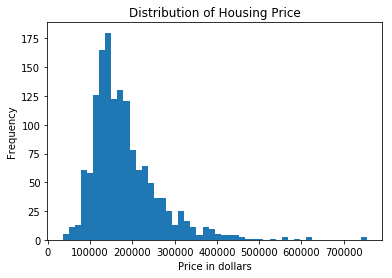

In [10]:
df['SalePrice'].plot.hist(bins=50)
plt.title('Distribution of Housing Price')
plt.xlabel('Price in dollars')
plt.show()

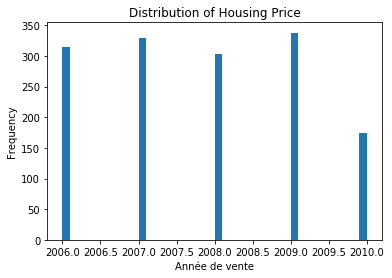

the data is made of different years which might impact price history


In [11]:
df['YrSold'].plot.hist(bins=40)
plt.title('Distribution of Housing Price')
plt.xlabel('Année de vente')
plt.show()

print('the data is made of different years which might impact price history')

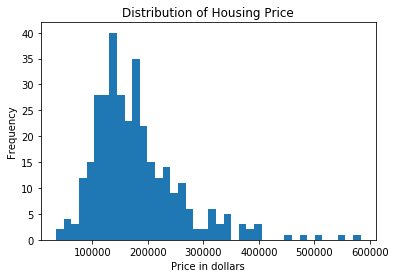

In [12]:
df[df['YrSold']==2009]['SalePrice'].plot.hist(bins=40)
plt.title('Distribution of Housing Price')
plt.xlabel('Price in dollars')
plt.show()

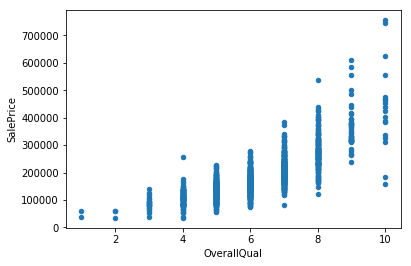

In [44]:
df.plot.scatter(x='OverallQual', y='SalePrice', style='o')
plt.show()

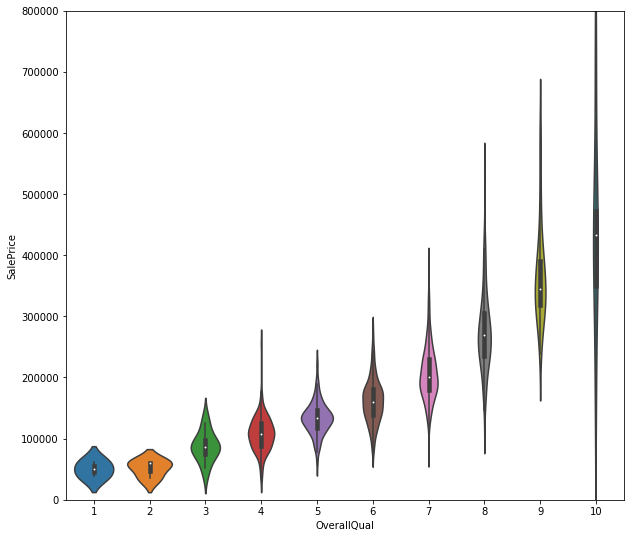

In [13]:
f, ax = plt.subplots(figsize=(10, 9))
fig = sns.violinplot(x='OverallQual', y="SalePrice", data=df[['OverallQual', 'SalePrice']])
fig.axis(ymin=0, ymax=800000);
plt.show()

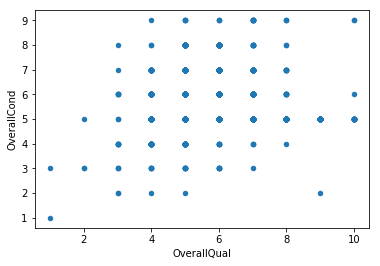

In [16]:
df.plot(kind='scatter', x='OverallQual', y='OverallCond')
plt.show()


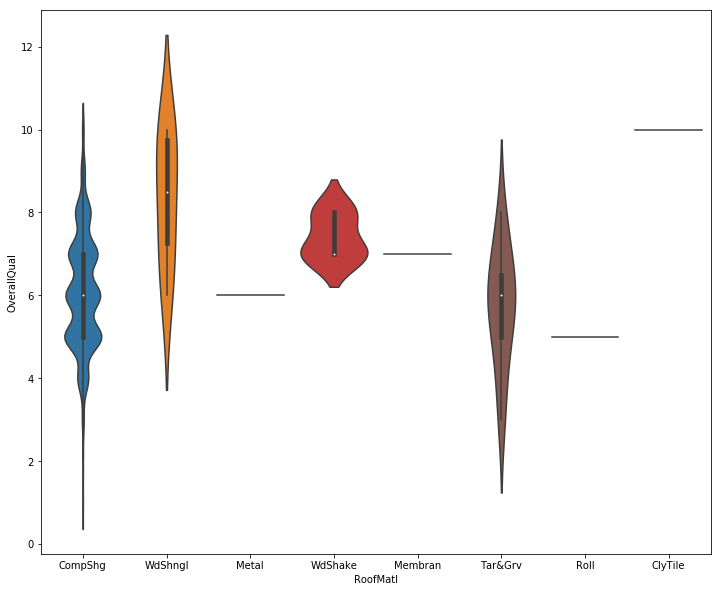

In [28]:
plt.figure(figsize=(12,10))
sns.violinplot(x="RoofMatl", y="OverallQual", data=df)
plt.show()

In [31]:
df[df['RoofMatl']=='WdShake'].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,5.00000,2.000000,5.000000,5.000000,5.000000,5.000000,5.0,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.0,5.000000,5.0,5.0,5.000000,5.000000,5.000000
mean,44.00000,94.000000,15797.800000,7.400000,6.200000,1976.000000,1984.0,190.600000,484.600000,80.000000,...,216.400000,27.200000,34.800000,0.0,55.200000,0.0,0.0,5.400000,2008.200000,241400.000000
std,26.07681,2.828427,4921.663713,0.547723,0.447214,5.385165,13.0,289.295351,664.380012,178.885438,...,237.041768,37.352376,77.815166,0.0,123.430952,0.0,0.0,3.646917,1.788854,36218.779659
min,20.00000,92.000000,11275.000000,7.000000,6.000000,1967.000000,1976.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,1.000000,2006.000000,190000.000000
25%,20.00000,93.000000,11952.000000,7.000000,6.000000,1976.000000,1977.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,4.000000,2007.000000,228000.000000
50%,40.00000,94.000000,15498.000000,7.000000,6.000000,1977.000000,1979.0,0.000000,0.000000,0.000000,...,240.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,5.000000,2008.000000,242000.000000
75%,60.00000,95.000000,16669.000000,8.000000,6.000000,1979.000000,1981.0,300.000000,1165.000000,0.000000,...,268.000000,64.000000,0.000000,0.0,0.000000,0.0,0.0,6.000000,2010.000000,260000.000000
max,80.00000,96.000000,23595.000000,8.000000,7.000000,1981.000000,2007.0,653.000000,1258.000000,400.000000,...,574.000000,72.000000,174.000000,0.0,276.000000,0.0,0.0,11.000000,2010.000000,287000.000000


In [32]:
df[df['RoofMatl']=='ClyTile'].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,60.0,313.0,63887.0,10.0,5.0,2008.0,2008.0,796.0,5644.0,0.0,...,214.0,292.0,0.0,0.0,0.0,480.0,0.0,1.0,2008.0,160000.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,60.0,313.0,63887.0,10.0,5.0,2008.0,2008.0,796.0,5644.0,0.0,...,214.0,292.0,0.0,0.0,0.0,480.0,0.0,1.0,2008.0,160000.0
25%,60.0,313.0,63887.0,10.0,5.0,2008.0,2008.0,796.0,5644.0,0.0,...,214.0,292.0,0.0,0.0,0.0,480.0,0.0,1.0,2008.0,160000.0
50%,60.0,313.0,63887.0,10.0,5.0,2008.0,2008.0,796.0,5644.0,0.0,...,214.0,292.0,0.0,0.0,0.0,480.0,0.0,1.0,2008.0,160000.0
75%,60.0,313.0,63887.0,10.0,5.0,2008.0,2008.0,796.0,5644.0,0.0,...,214.0,292.0,0.0,0.0,0.0,480.0,0.0,1.0,2008.0,160000.0
max,60.0,313.0,63887.0,10.0,5.0,2008.0,2008.0,796.0,5644.0,0.0,...,214.0,292.0,0.0,0.0,0.0,480.0,0.0,1.0,2008.0,160000.0


In [34]:
df.groupby(['RoofMatl']).describe()

1stFlrSF                                                             \
            count         mean         std     min      25%     50%      75%   
RoofMatl                                                                       
ClyTile       1.0  4692.000000         NaN  4692.0  4692.00  4692.0  4692.00   
CompShg    1434.0  1152.721757  368.399757   334.0   877.50  1080.0  1380.25   
Membran       1.0  1363.000000         NaN  1363.0  1363.00  1363.0  1363.00   
Metal         1.0   988.000000         NaN   988.0   988.00   988.0   988.00   
Roll          1.0   928.000000         NaN   928.0   928.00   928.0   928.00   
Tar&Grv      11.0  1477.636364  402.010267   944.0  1218.50  1465.0  1619.00   
WdShake       5.0  1799.200000  680.293834  1161.0  1332.00  1707.0  1898.00   
WdShngl       6.0  1868.500000  503.157133  1350.0  1521.75  1687.5  2293.50   

                 2ndFlrSF               ...   YearRemodAdd          YrSold  \
             max    count        mean   ...            75%     max   count   
RoofMatl                                ...                                  
ClyTile   4692.0      1.0  950.000000   ...         2008.0  2008.0     1.0   
CompShg   3228.0   1434.0  346.366806   ...         2004.0  2010.0  1434.0   
Membran   1363.0      1.0    0.000000   ...         2005.0  2005.0     1.0   
Metal      988.0      1.0    0.000000   ...         1969.0  1969.0     1.0   
Roll       928.0      1.0  992.000000   ...         1950.0  1950.0     1.0   
Tar&Grv   2217.0     11.0  227.909091   ...         1986.5  2007.0    11.0   
WdShake   2898.0      5.0  416.000000   ...         1981.0  2007.0     5.0   
WdShngl   2524.0      6.0  565.000000   ...         1991.5  1995.0     6.0   

                                                                          
                 mean       std     min     25%     50%      75%     max  
RoofMatl                                                                  
ClyTile   2008.000000       NaN  2008.0  2008.0  2008.0  2008.00  2008.0  
CompShg   2007.820781  1.328978  2006.0  2007.0  2008.0  2009.00  2010.0  
Membran   2008.000000       NaN  2008.0  2008.0  2008.0  2008.00  2008.0  
Metal     2006.000000       NaN  2006.0  2006.0  2006.0  2006.00  2006.0  
Roll      2007.000000       NaN  2007.0  2007.0  2007.0  2007.00  2007.0  
Tar&Grv   2007.636364  1.120065  2006.0  2007.0  2008.0  2008.50  2009.0  
WdShake   2008.200000  1.788854  2006.0  2007.0  2008.0  2010.00  2010.0  
WdShngl   2007.000000  1.264911  2006.0  2006.0  2006.5  2007.75  2009.0  

[8 rows x 296 columns]

In [35]:
df.groupby(['Exterior1st']).describe()

1stFlrSF                                                    \
               count         mean         std     min      25%     50%   
Exterior1st                                                              
AsbShng         20.0   944.550000  284.083286   480.0   759.00   932.0   
AsphShn          1.0  1664.000000         NaN  1664.0  1664.00  1664.0   
BrkComm          2.0  1110.000000  234.759451   944.0  1027.00  1110.0   
BrkFace         50.0  1415.240000  493.279139   649.0  1040.00  1278.5   
CBlock           1.0   840.000000         NaN   840.0   840.00   840.0   
CemntBd         61.0  1309.524590  539.476215   526.0   822.00  1338.0   
HdBoard        222.0  1093.914414  332.628959   483.0   866.50  1040.0   
ImStucc          1.0  1624.000000         NaN  1624.0  1624.00  1624.0   
MetalSd        220.0  1025.509091  285.450737   520.0   819.50   979.0   
Plywood        108.0  1322.851852  323.199652   626.0  1083.25  1267.5   
Stone            2.0  2354.500000  768.625071  1811.0  2082.75  2354.5   
Stucco          25.0  1243.760000  798.800991   686.0   864.00  1040.0   
VinylSd        515.0  1199.524272  367.700395   334.0   894.00  1134.0   
Wd Sdng        206.0  1113.276699  361.378764   438.0   865.25  1051.0   
WdShing         26.0  1051.192308  341.117929   694.0   822.00   974.0   

                             2ndFlrSF               ...   YearRemodAdd  \
                 75%     max    count        mean   ...            75%   
Exterior1st                                         ...                  
AsbShng      1080.00  1661.0     20.0  409.850000   ...        1958.25   
AsphShn      1664.00  1664.0      1.0    0.000000   ...        1965.00   
BrkComm      1193.00  1276.0      2.0    0.000000   ...        1956.50   
BrkFace      1714.25  3228.0     50.0  208.120000   ...        1985.50   
CBlock        840.00   840.0      1.0  534.000000   ...        1950.00   
CemntBd      1689.00  3138.0     61.0  401.098361   ...        2007.00   
HdBoard      1265.00  2444.0    222.0  305.166667   ...        1992.00   
ImStucc      1624.00  1624.0      1.0    0.000000   ...        1995.00   
MetalSd      1201.75  2113.0    220.0  318.081818   ...        2000.00   
Plywood      1569.00  2223.0    108.0  231.833333   ...        1984.75   
Stone        2626.25  2898.0      2.0    0.000000   ...        1997.00   
Stucco       1236.00  4692.0     25.0  531.880000   ...        2000.00   
VinylSd      1479.00  2633.0    515.0  411.753398   ...        2006.00   
Wd Sdng      1319.75  2515.0    206.0  331.009709   ...        1998.00   
WdShing      1160.75  2158.0     26.0  257.846154   ...        1994.50   

                    YrSold                                                  \
                max  count         mean       std     min      25%     50%   
Exterior1st                                                                  
AsbShng      1996.0   20.0  2007.550000  1.356272  2006.0  2006.00  2008.0   
AsphShn      1965.0    1.0  2010.000000       NaN  2010.0  2010.00  2010.0   
BrkComm      1958.0    2.0  2009.000000  0.000000  2009.0  2009.00  2009.0   
BrkFace      2003.0   50.0  2008.000000  1.414214  2006.0  2007.00  2008.0   
CBlock       1950.0    1.0  2009.000000       NaN  2009.0  2009.00  2009.0   
CemntBd      2009.0   61.0  2007.983607  1.244880  2006.0  2007.00  2008.0   
HdBoard      2010.0  222.0  2007.860360  1.326157  2006.0  2007.00  2008.0   
ImStucc      1995.0    1.0  2006.000000       NaN  2006.0  2006.00  2006.0   
MetalSd      2009.0  220.0  2007.754545  1.265534  2006.0  2007.00  2008.0   
Plywood      2006.0  108.0  2008.064815  1.348403  2006.0  2007.00  2008.0   
Stone        2004.0    2.0  2007.000000  1.414214  2006.0  2006.50  2007.0   
Stucco       2009.0   25.0  2007.600000  1.322876  2006.0  2006.00  2008.0   
VinylSd      2010.0  515.0  2007.794175  1.337998  2006.0  2007.00  2008.0   
Wd Sdng      2009.0  206.0  2007.747573  1.363056  2006.0  2007.00  2008.0   
WdShing      2007.0 

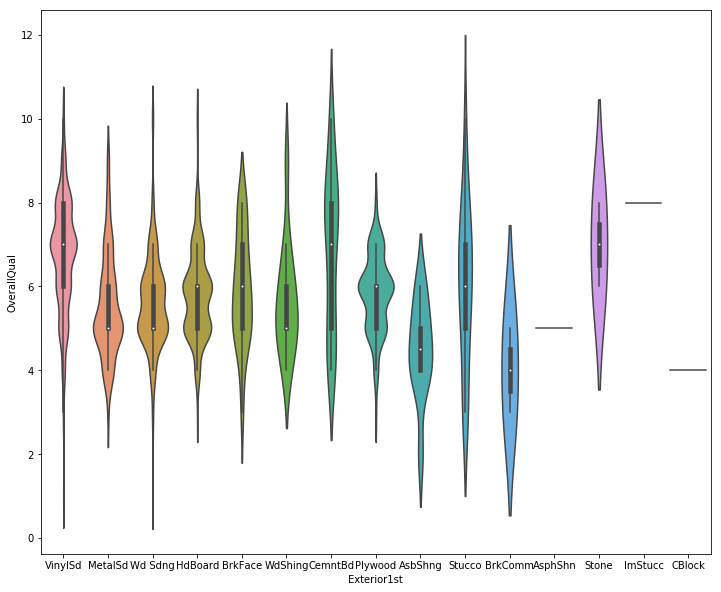

In [36]:
plt.figure(figsize=(12,10))
sns.violinplot(x="Exterior1st", y="OverallQual", data=df)
plt.show()

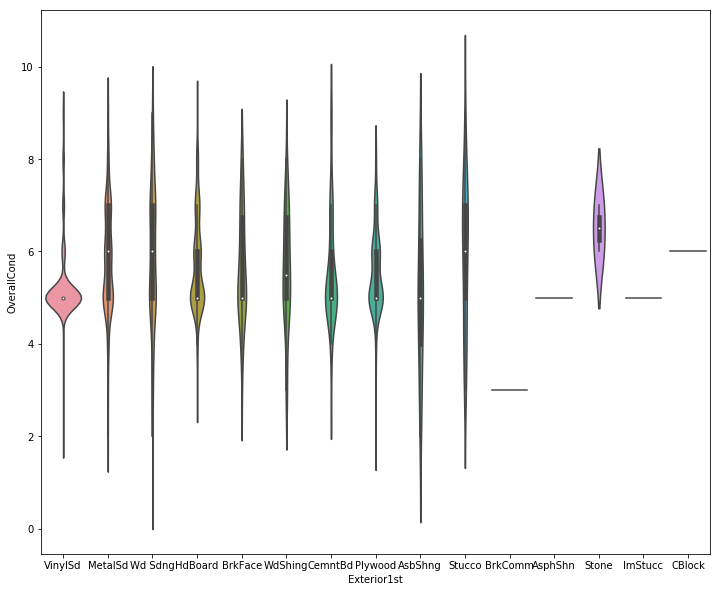

In [37]:
plt.figure(figsize=(12,10))
sns.violinplot(x="Exterior1st", y="OverallCond", data=df)
plt.show()

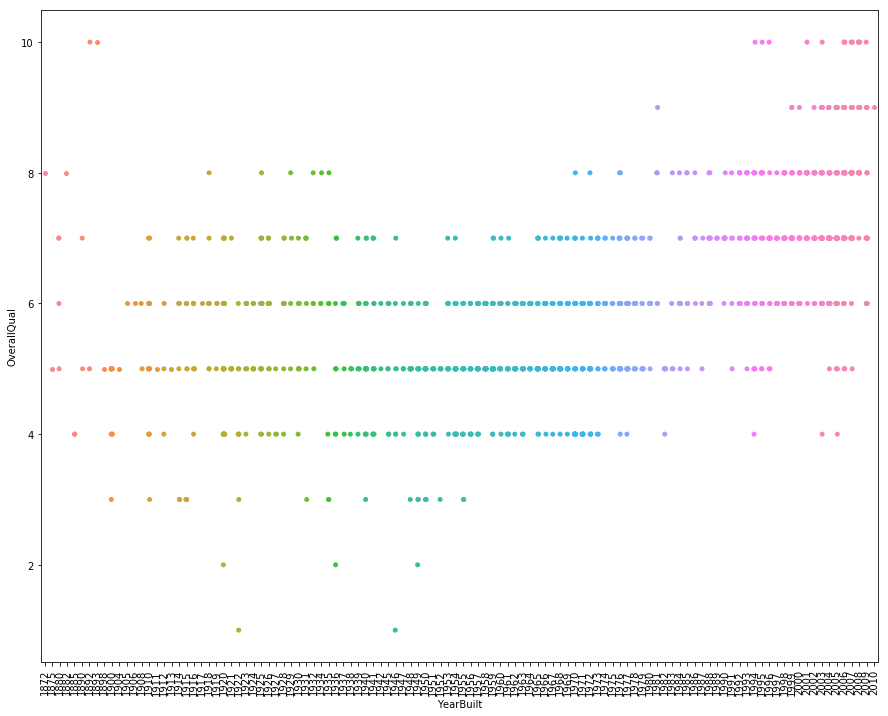

In [46]:
plt.figure(figsize=(15,12))
sns.stripplot(x="YearBuilt", y="OverallQual", data=df, jitter=True);
plt.xticks(rotation='vertical')
plt.show()

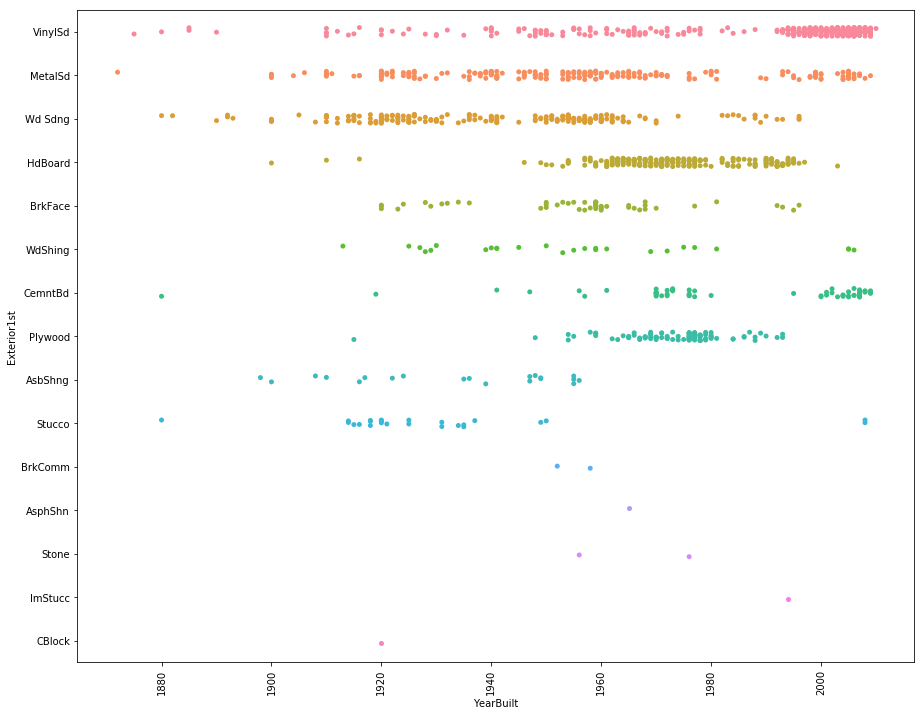

In [47]:
plt.figure(figsize=(15,12))
sns.stripplot(x="YearBuilt", y="Exterior1st", data=df, jitter=True);
plt.xticks(rotation='vertical')
plt.show()

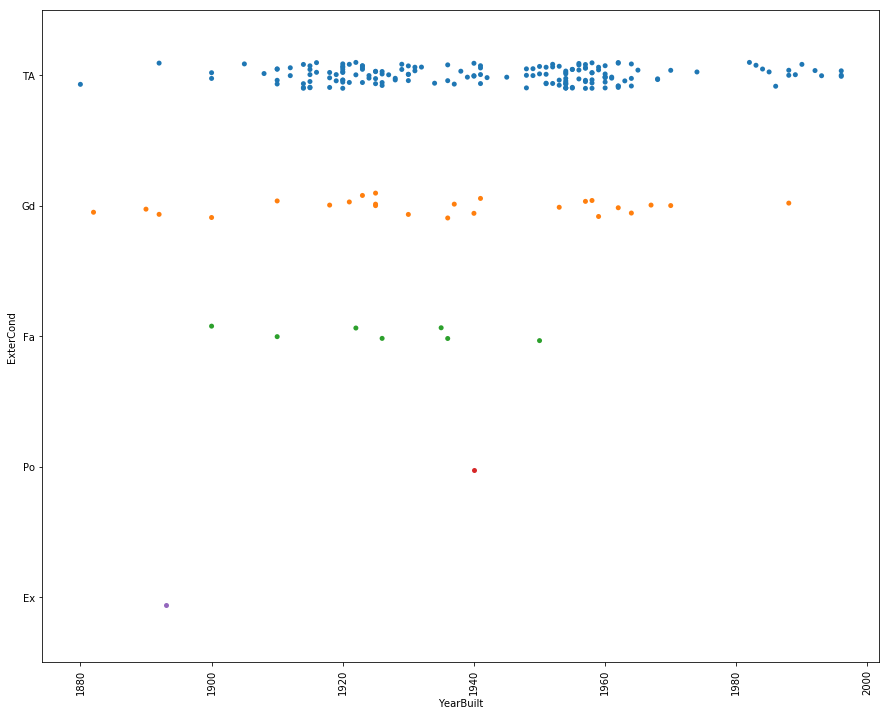

In [51]:
plt.figure(figsize=(15,12))
sns.stripplot(x="YearBuilt", y="ExterCond", data=df[df['Exterior1st']=='Wd Sdng'], jitter=True);
plt.xticks(rotation='vertical')
plt.show()
                                                      